AMV Historical Data

In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
# 2. Đọc file dữ liệu
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [4]:
# 3. Chia dữ liệu train, test
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [5]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [6]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[21309.78199703 21324.61504582 21339.44809461 21354.2811434
 21369.11419219 21383.94724098 21398.78028977 21413.61333856
 21428.44638735 21443.27943614 21458.11248492 21472.94553371
 21487.7785825  21502.61163129 21517.44468008 21532.27772887
 21547.11077766 21561.94382645 21576.77687524 21591.60992403
 21606.44297282 21621.27602161 21636.1090704  21650.94211919
 21665.77516798 21680.60821677 21695.44126556 21710.27431434
 21725.10736313 21739.94041192]


In [8]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MLSE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 6907.313586049893
Testing RMSE: 6907.313586049893
Validation MAPE: 51.82532190875118
Testing MAPE: 51.82532190875118
Validation MSLE: 0.1757801368008811
Testing MSLE: 0.1757801368008811


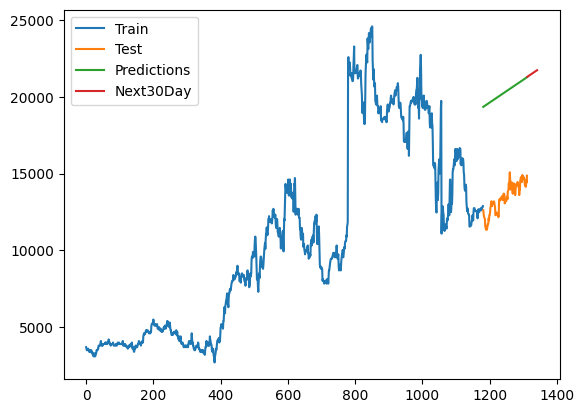

In [9]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

DHT Historical Data

In [10]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [11]:
# 2. Đọc file dữ liệu
df = pd.read_csv('DHT Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [12]:
df

0       40400.0
1       39300.0
2       39500.0
3       39300.0
4       38600.0
         ...   
1307    11589.7
1308    11561.6
1309    11337.1
1310    11224.9
1311    10860.1
Name: Price, Length: 1312, dtype: float64

In [13]:
# 3. Chia dữ liệu train, test
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

In [14]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [16]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[21294.94894824 21309.78199703 21324.61504582 21339.44809461
 21354.2811434  21369.11419219 21383.94724098 21398.78028977
 21413.61333856 21428.44638735 21443.27943614 21458.11248492
 21472.94553371 21487.7785825  21502.61163129 21517.44468008
 21532.27772887 21547.11077766 21561.94382645 21576.77687524
 21591.60992403 21606.44297282 21621.27602161 21636.1090704
 21650.94211919 21665.77516798 21680.60821677 21695.44126556
 21710.27431434 21725.10736313]


In [17]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MLSE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 6907.313586049893
Testing RMSE: 6907.313586049893
Validation MAPE: 51.82532190875118
Testing MAPE: 51.82532190875118
Validation MSLE: 0.1757801368008811
Testing MSLE: 0.1757801368008811


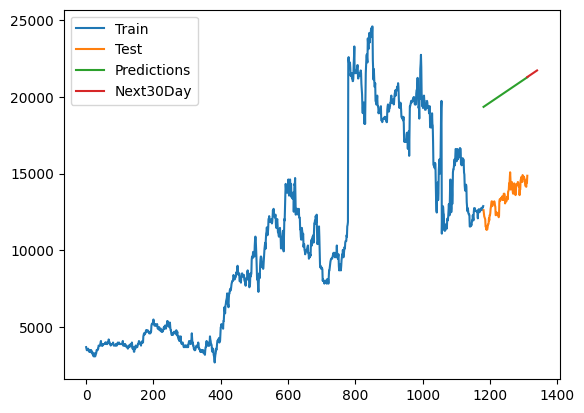

In [18]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

DP3 Historical Data

In [19]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [20]:
# 2. Đọc file dữ liệu
df = pd.read_csv('DP3 Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [21]:
df

0       61600.0
1       61500.0
2       61000.0
3       61000.0
4       60900.0
         ...   
1132    76300.0
1133    74700.0
1134    74400.0
1135    74900.0
1136    73800.0
Name: Price, Length: 1137, dtype: float64

In [22]:
# 3. Chia dữ liệu train, test
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

In [23]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [25]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[18699.16541009 18713.99845888 18728.83150767 18743.66455646
 18758.49760525 18773.33065404 18788.16370283 18802.99675162
 18817.82980041 18832.66284919 18847.49589798 18862.32894677
 18877.16199556 18891.99504435 18906.82809314 18921.66114193
 18936.49419072 18951.32723951 18966.1602883  18980.99333709
 18995.82638588 19010.65943467 19025.49248346 19040.32553225
 19055.15858104 19069.99162983 19084.82467862 19099.6577274
 19114.49077619 19129.32382498]


In [26]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MLSE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 6907.313586049893
Testing RMSE: 6907.313586049893
Validation MAPE: 51.82532190875118
Testing MAPE: 51.82532190875118
Validation MSLE: 0.1757801368008811
Testing MSLE: 0.1757801368008811


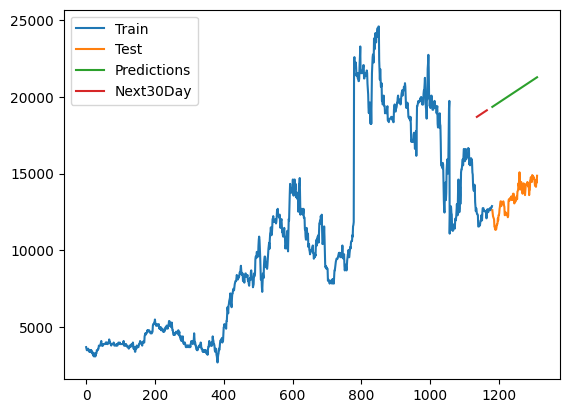

In [27]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()